# Задание 1. Первичный анализ данных с Pandas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("weights_heights.csv", index_col = "Index")

In [17]:
data.head(n=5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [26]:
?pd.DataFrame.plot

Height distribution

<AxesSubplot:title={'center':'Height disribution'}, ylabel='Frequency'>

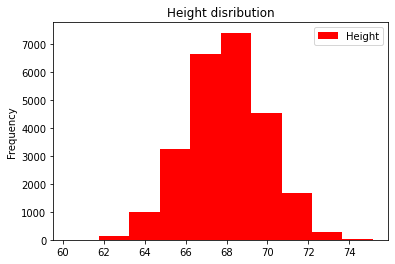

In [33]:
data.plot(kind="hist", y="Height", title="Height disribution", 
          color="red", xlabel="height", legend=True)

Weight distribution